In [ ]:
# Instalar pacotes: roda apenas uma vez
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [1]:
# Load the Digits Dataset
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print(f'Image data shape: {digits.data.shape}')

# Print to show there are 1797 labels (integers from 0-9)
print(f'Label data shape {digits.target.shape}')

Image data shape: (1797, 64)
Label data shape (1797,)


**Showing the images and the labels**

In [3]:
import numpy as np
import matplotlib.pyplot as plt

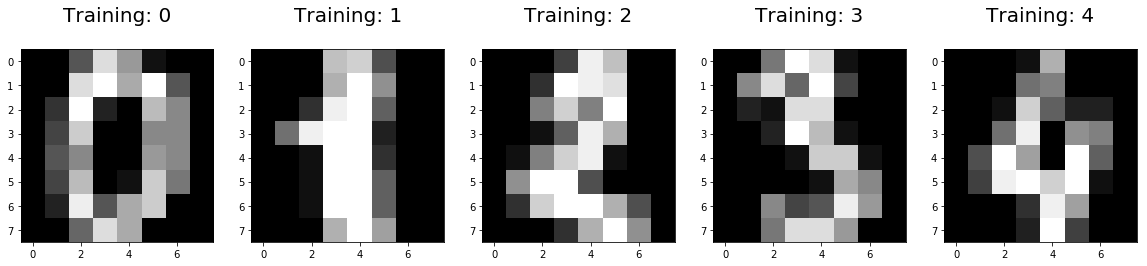

In [4]:
plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=20)

**Splitting Data into Training and Test Sets**

In [170]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.25, random_state=0)

**Scikit_learn 4-Step Modleing Pattern**

**Step 1.** Import the model you want to use. 

In sklearn, all machine learning models are implemented as Python classes.

In [171]:
from sklearn.linear_model import LogisticRegression

**Step 2.** Make as instance of the Model

In [172]:
# All parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

**Step 3.** Training the model on the data, storing the information learned from the data.

Model is learning the relationship between digits (x_train) and labels (y_train).

In [173]:
logisticRegr.fit(x_train, y_train)

C:\Users\F0125310\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\F0125310\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

**Step4.** Predict label for new data (new images)

Uses the information the model learned during the model training process.

In [174]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1, -1))

array([2])

Predict for Multiple Observations (images) at Once

In [175]:
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

Make predictions on entire test data

In [176]:
prediction = logisticRegr.predict(x_test)

**Mesuring Model Performance**

We are going to keep this simple and use accuracy as our metric. To do this are going to see how the model performs on the new data (test set).

Accuracy is defined as:
$$FractionOfCorrectPoints = \frac{CorrectPrediction}{TotalNmberOfDataPoints}$$

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. In this classification, I am just showing two python packages (Seaborn and Matplotlib) for making confusion matrices more understandable and visually appealing.

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

The confusion matrix below is not visually super informative or visually appealing.

In [178]:
cm = metrics.confusion_matrix(y_test, prediction)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


**Confusion matrix in Seaborn**

As you can see below, this method produces a more understandable and visually readable confusion matrix using seaborn.

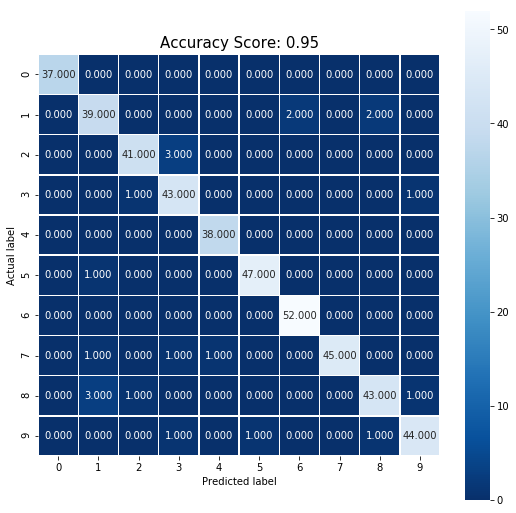

In [179]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = f'Accuracy Score: {score:.2f}'
plt.title(all_sample_title, size = 15);

In [191]:
import numpy as np
import matplotlib.pyplot as plt

misclassifiedIndexes = []
for i in range(len(y_test)):
    if y_test[i] != prediction[i]:
        misclassifiedIndexes.append(i)

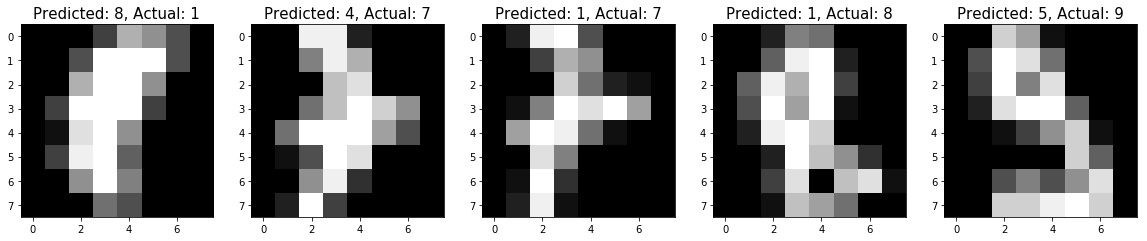

In [193]:
plt.figure(figsize=(20, 4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test[badIndex], (8, 8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(prediction[badIndex], y_test[badIndex]), fontsize = 15)